### We are not going to load all the data in RAM upfront

Unlike last example, where we loaded the entire data in 1 go in the RAM, here we will load chunk by chunk and then train the model.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
from shutil import copyfile

create a folder structure 

+ Master_folder
    + Train
        + Cats
        + Dogs
    + Test
        + Cats
        + Dogs
    + Validation
        + Cats
        + Dogs

#### Setup the data paths

In [3]:
pwd

u'/Users/airwoot/Documents/Anuj/Coding/GitHub/DeepNets/Keras/Keras_from_scratch/Vision'

In [4]:
base_path = "/"

U = os.path.join(base_path, "Users")
a = os.path.join(U, "airwoot")
d = os.path.join(a, "Documents")
A = os.path.join(d, "Anuj")
W = os.path.join(A, "Warehouse")
Data = os.path.join(W, "train")


In [5]:
source_dir = Data
dest_dir = os.path.join(W,"cats_and_dogs_1")

In [6]:
print(source_dir)
print(dest_dir)

print(os.listdir(source_dir))


/Users/airwoot/Documents/Anuj/Warehouse/train
/Users/airwoot/Documents/Anuj/Warehouse/cats_and_dogs_1
['.DS_Store', 'CAT', 'DOG']


In [7]:
cat_source_dir = os.path.join(source_dir, "CAT")
dog_source_dir = os.path.join(source_dir, "DOG")

In [8]:
#count number of cat and dog files

print(len(os.listdir(cat_source_dir)))
print(len(os.listdir(dog_source_dir)))

12500
12500


In [9]:
train_dest_dir = os.path.join(dest_dir, "train")
test_dest_dir = os.path.join(dest_dir, "test")
validation_dest_dir = os.path.join(dest_dir, "validation")

In [10]:
cat_train_dir = os.path.join(train_dest_dir, "cat")
dog_train_dir = os.path.join(train_dest_dir, "dog")

cat_test_dir = os.path.join(test_dest_dir, "cat")
dog_test_dir = os.path.join(test_dest_dir, "dog")


cat_validation_dir = os.path.join(validation_dest_dir, "cat")
dog_validation_dir = os.path.join(validation_dest_dir, "dog")

In [11]:
print(cat_train_dir)
print(dog_train_dir)

print(cat_test_dir)
print(dog_test_dir)

print(cat_validation_dir)
print(dog_validation_dir)

/Users/airwoot/Documents/Anuj/Warehouse/cats_and_dogs_1/train/cat
/Users/airwoot/Documents/Anuj/Warehouse/cats_and_dogs_1/train/dog
/Users/airwoot/Documents/Anuj/Warehouse/cats_and_dogs_1/test/cat
/Users/airwoot/Documents/Anuj/Warehouse/cats_and_dogs_1/test/dog
/Users/airwoot/Documents/Anuj/Warehouse/cats_and_dogs_1/validation/cat
/Users/airwoot/Documents/Anuj/Warehouse/cats_and_dogs_1/validation/dog


In [17]:
## All paths are set, let us just create them

if not(os.path.exists(dest_dir)):
    os.mkdir(dest_dir)
    
if not(os.path.exists(train_dest_dir)):
    os.mkdir(train_dest_dir)
    
if not(os.path.exists(test_dest_dir)):
    os.mkdir(test_dest_dir)
    
if not(os.path.exists(validation_dest_dir)):
    os.mkdir(validation_dest_dir)


In [18]:
if not(os.path.exists(cat_train_dir)):
    os.mkdir(cat_train_dir)
if not(os.path.exists(dog_train_dir)):
    os.mkdir(dog_train_dir)
    
if not(os.path.exists(cat_test_dir)):
    os.mkdir(cat_test_dir)
if not(os.path.exists(dog_test_dir)):
    os.mkdir(dog_test_dir)

if not(os.path.exists(cat_validation_dir)):
    os.mkdir(cat_validation_dir)
if not(os.path.exists(dog_validation_dir)):
    os.mkdir(dog_validation_dir)

In [12]:
print(len(os.listdir(cat_train_dir)))
print(len(os.listdir(dog_train_dir)))
print("\n")

print(len(os.listdir(cat_test_dir)))
print(len(os.listdir(dog_test_dir)))
print("\n")

print(len(os.listdir(cat_validation_dir)))
print(len(os.listdir(dog_validation_dir)))
print("\n")

2000
2000


1000
1000


1000
1000




### We need to move data from source to dest 
    Per class 2000 train, 1000 test and 1000 validation 

In [25]:
# CAT -> train
fnames = ["cat.{}.jpg".format(i) for i in range(0,2000)]
print(fnames[:10])

source_file = os.path.join(cat_source_dir, fnames[0])
dest_file = os.path.join(cat_train_dir, fnames[0])

print(source_file)
print(dest_file)

/Users/airwoot/Documents/Anuj/Warehouse/train/CAT/cat.0.jpg
/Users/airwoot/Documents/Anuj/Warehouse/cats_and_dogs_1/train/cat/cat.0.jpg


In [26]:
for fname in fnames:
    source_file = os.path.join(cat_source_dir, fname)
    dest_file = os.path.join(cat_train_dir, fname)
    copyfile(source_file, dest_file)

In [28]:
# DOG -> train

fnames = ["dog.{}.jpg".format(i) for i in range(0,2000)]
print(fnames[:10])

source_file = os.path.join(dog_source_dir, fnames[0])
dest_file = os.path.join(dog_train_dir, fnames[0])

print(source_file)
print(dest_file)

['dog.0.jpg', 'dog.1.jpg', 'dog.2.jpg', 'dog.3.jpg', 'dog.4.jpg', 'dog.5.jpg', 'dog.6.jpg', 'dog.7.jpg', 'dog.8.jpg', 'dog.9.jpg']
/Users/airwoot/Documents/Anuj/Warehouse/train/DOG/dog.0.jpg
/Users/airwoot/Documents/Anuj/Warehouse/cats_and_dogs_1/train/dog/dog.0.jpg


In [29]:
for fname in fnames:
    source_file = os.path.join(dog_source_dir, fname)
    dest_file = os.path.join(dog_train_dir, fname)
    copyfile(source_file, dest_file)

In [30]:
# CAT -> test
fnames = ["cat.{}.jpg".format(i) for i in range(2000, 3000)]
print(fnames[:10])

source_file = os.path.join(cat_source_dir, fnames[0])
dest_file = os.path.join(cat_test_dir, fnames[0])

print(source_file)
print(dest_file)

for fname in fnames:
    source_file = os.path.join(cat_source_dir, fname)
    dest_file = os.path.join(cat_test_dir, fname)
    copyfile(source_file, dest_file)

['cat.2000.jpg', 'cat.2001.jpg', 'cat.2002.jpg', 'cat.2003.jpg', 'cat.2004.jpg', 'cat.2005.jpg', 'cat.2006.jpg', 'cat.2007.jpg', 'cat.2008.jpg', 'cat.2009.jpg']
/Users/airwoot/Documents/Anuj/Warehouse/train/CAT/cat.2000.jpg
/Users/airwoot/Documents/Anuj/Warehouse/cats_and_dogs_1/test/cat/cat.2000.jpg


In [31]:
# DOG -> test

fnames = ["dog.{}.jpg".format(i) for i in range(2000, 3000)]
print(fnames[:10])

source_file = os.path.join(dog_source_dir, fnames[0])
dest_file = os.path.join(dog_test_dir, fnames[0])

print(source_file)
print(dest_file)

for fname in fnames:
    source_file = os.path.join(dog_source_dir, fname)
    dest_file = os.path.join(dog_test_dir, fname)
    copyfile(source_file, dest_file)

['dog.2000.jpg', 'dog.2001.jpg', 'dog.2002.jpg', 'dog.2003.jpg', 'dog.2004.jpg', 'dog.2005.jpg', 'dog.2006.jpg', 'dog.2007.jpg', 'dog.2008.jpg', 'dog.2009.jpg']
/Users/airwoot/Documents/Anuj/Warehouse/train/DOG/dog.2000.jpg
/Users/airwoot/Documents/Anuj/Warehouse/cats_and_dogs_1/test/dog/dog.2000.jpg


In [32]:
# CAT -> validation
fnames = ["cat.{}.jpg".format(i) for i in range(3000, 4000)]

for fname in fnames:
    source_file = os.path.join(cat_source_dir, fname)
    dest_file = os.path.join(cat_validation_dir, fname)
    copyfile(source_file, dest_file)

    
# DOG -> validation
fnames = ["dog.{}.jpg".format(i) for i in range(3000, 4000)]

for fname in fnames:
    source_file = os.path.join(dog_source_dir, fname)
    dest_file = os.path.join(dog_validation_dir, fname)
    copyfile(source_file, dest_file)
    


In [13]:
print(len(os.listdir(cat_train_dir)))
print(len(os.listdir(dog_train_dir)))
print("\n")

print(len(os.listdir(cat_test_dir)))
print(len(os.listdir(dog_test_dir)))
print("\n")

print(len(os.listdir(cat_validation_dir)))
print(len(os.listdir(dog_validation_dir)))
print("\n")

2000
2000


1000
1000


1000
1000




In [14]:
# all files are set

# create data generators

In [15]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [16]:
# for training we need only train and validation DG

train_DG = ImageDataGenerator(rescale=1.0/255)

validation_DG = ImageDataGenerator(rescale=1.0/255)


In [17]:
train_generator = train_DG.flow_from_directory(
        train_dest_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = validation_DG.flow_from_directory(
        validation_dest_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 4000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


# Network

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten

In [28]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 82944)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               42467840  
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 513       
Total para

In [30]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Training Time

In [31]:
history = model.fit_generator(train_generator,
                                steps_per_epoch=5,
                                epochs=2,
                                validation_data=validation_generator,
                                validation_steps=800)

Epoch 1/2
5/5 [==============================] - 583s 117s/step - loss: 5.9850 - acc: 0.4625 - val_loss: 8.0476 - val_acc: 0.5000
Epoch 2/2
5/5 [==============================] - 494s 99s/step - loss: 7.6500 - acc: 0.5250 - val_loss: 7.9761 - val_acc: 0.5000


### Ploting

In [34]:
from matplotlib import pyplot as plt

In [36]:
history.history.keys()

['acc', 'loss', 'val_acc', 'val_loss']

In [37]:
training_error = history.history['loss']
training_acc = history.history['acc']

validation_error = history.history['val_loss']
validation_acc = history.history['val_acc']

In [42]:
num_of_epocs = range(1, (len(training_acc)+1))

[]

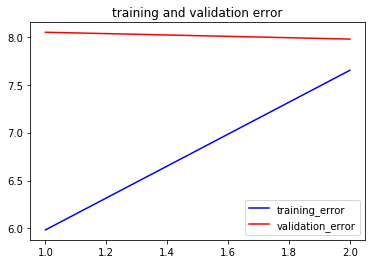

In [45]:
plt.plot(num_of_epocs, training_error, 'b', label='training_error')
plt.plot(num_of_epocs, validation_error, 'r', label='validation_error')

plt.title("training and validation error")
plt.legend()

plt.plot()

[]

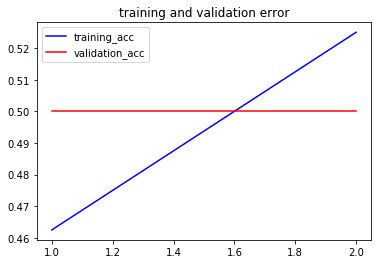

In [47]:
plt.plot(num_of_epocs, training_acc, 'b', label='training_acc')
plt.plot(num_of_epocs, validation_acc, 'r', label='validation_acc')

plt.title("training and validation error")
plt.legend()

plt.plot()